In [ ]:
import pandas as cla_imbps
cla_imb = cla_imbps.read_csv('drug200.csv')
cla_imb

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [ ]:
cla_imb.nunique()

Age             57
Sex              2
BP               3
Cholesterol      2
Na_to_K        198
Drug             5
dtype: int64

In [ ]:
cla_imb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
cla_imb['Drug'].value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

### steps of preprocessing

##### prediction of null

In [ ]:
cla_imb.isnull().values.sum()

0

##### prediction of duplicate

In [ ]:
cla_imb_dp = cla_imb[cla_imb.duplicated()]
cla_imb_dp

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


### steps of EDA

In [ ]:
import seaborn as cla_imbsn
import matplotlib.pyplot as cla_imbpt

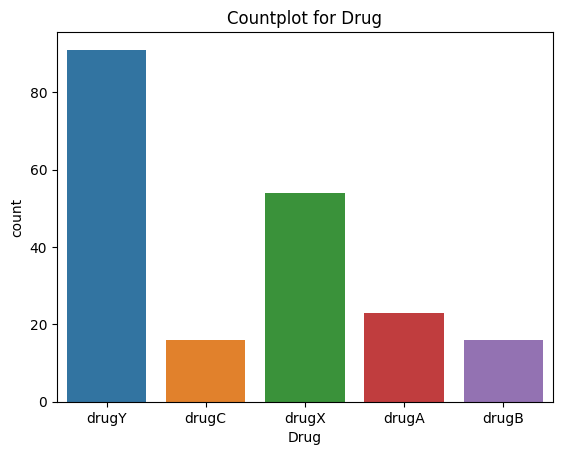

In [ ]:
cla_imbsn.countplot(x ='Drug', data = cla_imb)
cla_imbpt.title("Countplot for Drug")
cla_imbpt.show()

majority category in output class 'drugY'.

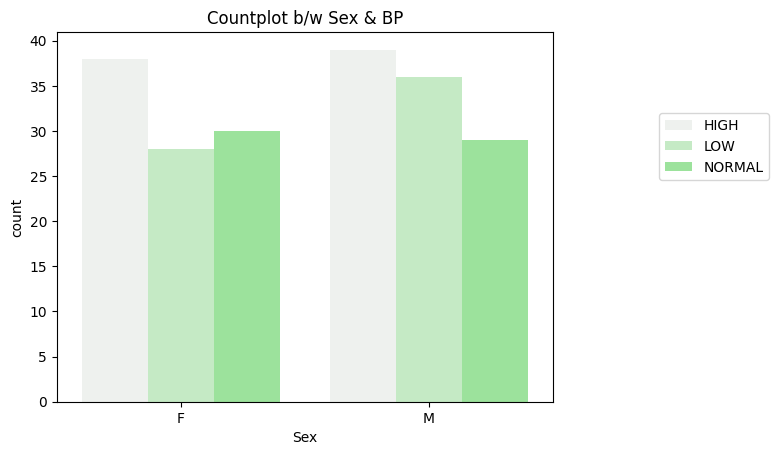

In [ ]:
cla_imbsn.countplot(x ='Sex', hue = "BP", data = cla_imb,color='lightgreen')
cla_imbpt.legend(loc='upper left', bbox_to_anchor=(1.2, .80))
cla_imbpt.title("Countplot b/w Sex & BP")
cla_imbpt.show()

male patients having high BP than female patients.

Text(0, 0.5, 'Age')

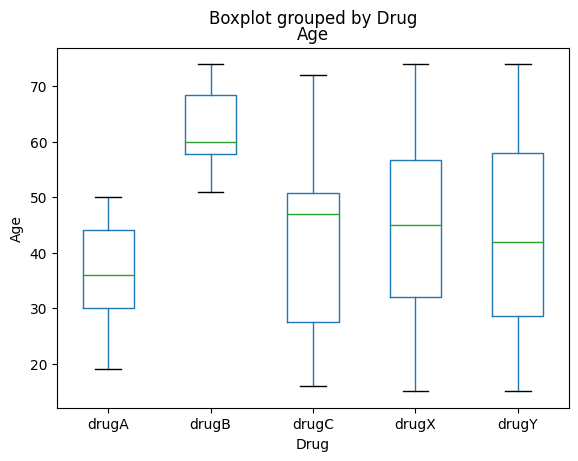

In [ ]:
cla_imb.boxplot(by ='Drug', column =['Age'], grid = False)
cla_imbpt.ylabel("Age")

drugB type only mentioned for aged patients in the above plot.

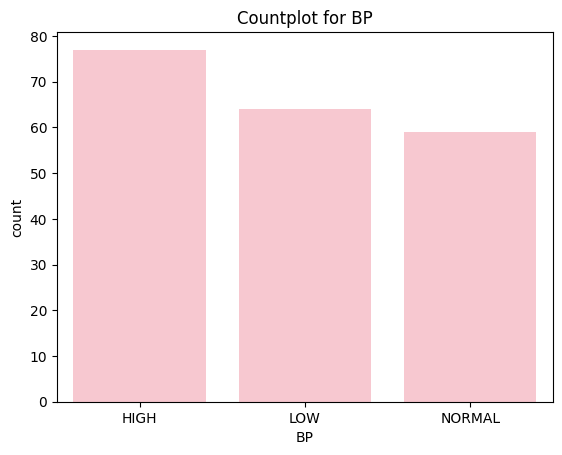

In [ ]:
cla_imbsn.countplot(x ='BP', data = cla_imb,color='pink')
cla_imbpt.title("Countplot for BP")
cla_imbpt.show()

high BP patinets are more comparatively.

### Label encoding

In [ ]:
from sklearn import preprocessing as cla_imbpres
cla_imb_lble = cla_imbpres.LabelEncoder()

cla_imb['Sex']= cla_imb_lble.fit_transform(cla_imb['Sex'])
cla_imb['BP']= cla_imb_lble.fit_transform(cla_imb['BP'])
cla_imb['Cholesterol']= cla_imb_lble.fit_transform(cla_imb['Cholesterol'])
cla_imb['Drug']= cla_imb_lble.fit_transform(cla_imb['Drug'])

In [ ]:
cla_imb

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
...,...,...,...,...,...,...
195,56,0,1,0,11.567,2
196,16,1,1,0,12.006,2
197,52,1,2,0,9.894,3
198,23,1,2,1,14.020,3


In [ ]:
cla_imb.to_csv('ppcess_drug200.csv', index=False)